tries: 1000.0
tries: 5000.0
tries: 10000.0
tries: 50000.0
tries: 100000.0
tries: 1000.0
tries: 5000.0
tries: 10000.0
tries: 50000.0
tries: 100000.0
The probability that the longest streak of ones in a Bernoulli iid sequence of length 200 has length 8 or more is 
0.31989000000000006


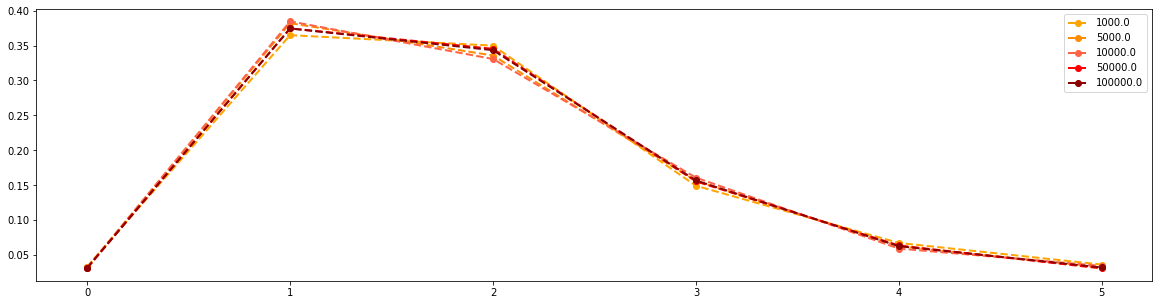

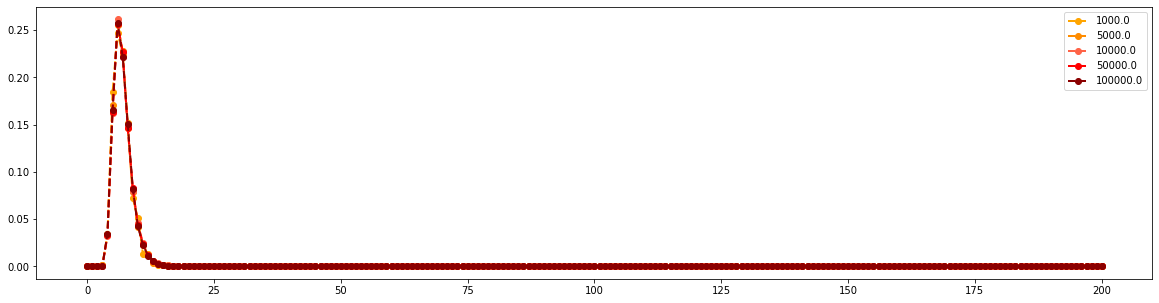

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import groupby
plt.close("all")
np.random.seed(2017)


def print_longest_streak(x):
    lst = [0]
    for n,c in groupby(x):
        num,count = n,sum(1 for i in c)
        if num==1:
            lst.append(count)
    return max(lst)
def pmf_longest_streak(n, tries):
    
    df = pd.DataFrame(index=np.arange(tries))
    df["streak_arr"] = "" 
    df["streak_arr"] = df["streak_arr"].apply(lambda x : list(np.random.randint(low=0, high=2, size=n)))
    df["max_streak"] = df["streak_arr"].apply(lambda x : print_longest_streak(x))
    df["count"] = df["max_streak"]
    
    out_df = pd.DataFrame(index=np.arange(n+1))
    out_df["max_streak"] = np.arange(n+1) 
    
    temp_df =df.groupby("max_streak", as_index=False)["count"].count()
    out_df = out_df.merge(temp_df, how="left", on ="max_streak")
    out_df["prob"] = out_df["count"]/tries
    out_df = out_df.fillna(0)
    out = list(out_df["prob"])
    return out
    
    # Write your Monte Carlo code here, n is the length of the sequence and tries is the number
    # of sampled sequences used to produce the estimate of the pmf

n_tries = [1e3,5e3,1e4,5e4,1e5]

n_vals = [5,200]

color_array = ['orange','darkorange','tomato','red', 'darkred', 'tomato', 'purple', 'grey', 'deepskyblue', 
               'maroon','darkgray','darkorange', 'steelblue', 'forestgreen', 'silver']
for ind_n in range(len(n_vals)):
    n = n_vals[ind_n]
    plt.figure(figsize=(20,5))
    for ind_tries in range(len(n_tries)):
        tries = n_tries[ind_tries]
        print("tries: " + str(tries))
        pmf_longest_tries = pmf_longest_streak(n, np.int(tries))
        plt.plot(range(n+1),pmf_longest_tries, marker='o',markersize=6,linestyle="dashed",lw=2,
                 color=color_array[ind_tries],
                 markeredgecolor= color_array[ind_tries],label=str(tries))
    plt.legend()
    
print("The probability that the longest streak of ones in a Bernoulli iid sequence of length 200 has length 8 or more is ")
print(sum(pmf_longest_tries[8:])) # Compute the probability and print it here


In [68]:
l = pmf_longest_streak(5,1000000)

In [69]:
l

[0.03162, 0.375581, 0.343444, 0.156151, 0.061841, 0.031363]